# Atividade 02 - Laboratório

Dado um conjunto definimos a moda como o valor mais observado.
Nas células a seguir usamos o método `count` de listas (que conta
a quantidade de vezes que o valor passado como argumento
aparece na lista) para descobrir a moda.

In [177]:
import random

random.seed(0)

l = random.choices(range(10), k = 20)

print(l)
print(l.count(2))

[8, 7, 4, 2, 5, 4, 7, 3, 4, 5, 9, 5, 2, 7, 6, 2, 9, 9, 8, 9]
3


Para contabilizarmos a quantidade de vezes que cada um dos valores aparece na lista vamos guardar esses dados em uma lista de tuplas cujos elementos são da forma `(n, fn)`,
onde `n` é o número na lista e `fn` é a quantidade de vezes que `n` aparece na lista `l`.

In [178]:
freq = [ (numero, l.count(numero)) for numero in set(l) ]

Agora iremos ordenar a lista de acordo com a quantidade de elementos de cada item, ou seja, usando o segundo elemento da tupla.

In [179]:
freq.sort(key = lambda par: par[1])
freq
print("A moda é", freq[-1][0])

A moda é 9


O método que usamos tem um problema: ele não capta os casos em que:
* Não há modas (isto é, todos os valores aparecem uma única vez)
* Há mais de uma moda (mais de um valor aparece com o número máximo de vezes)

#### Exercício 1

Adapte o código acima para detectar casos em que a população é amodal (sem modas) ou multimodal (mais de uma moda). Teste que com as listas a seguir.

In [180]:
l_trimodal = [8, 5, 9, 6, 5, 4, 3, 5, 2, 1, 1, 6, 6, 4, 0, 7, 8, 9, 8]

freq = [(numero, l_trimodal.count(numero)) for numero in set(l_trimodal)]

freq.sort(key=lambda par: par[1], reverse=True)

maior_frequencia = freq[0][1]

modas = []

for numero, frequencia in freq:
    if frequencia == maior_frequencia:
        modas.append(numero)
    else:
        break

print("As modas da lista são:", modas)

As modas da lista são: [5, 6, 8]


In [181]:
l_amodal = [9, 5, 2, 7, 12, 8, 4, 0, 3]

freq = [(numero, l_amodal.count(numero)) for numero in set(l_amodal)]

freq.sort(key=lambda par: par[1], reverse=True)

maior_frequencia = freq[0][1]

modas = []

for numero, frequencia in freq:
    if frequencia == maior_frequencia:
        modas.append(numero)
    else:
        break

cont = 0
for elemento in l_amodal:
    if elemento in modas:
        cont += 1

if cont == len(l_amodal):
    print("A lista é amodal")
else:
    print("As modas da lista são:", modas)

A lista é amodal


## Moda para dados agrupados em classes

O cálculo da moda como fizemos acima funciona  para dados categóricos
ou discretos com poucos valores possíveis. Como discutimos na construção das
tabelas de frequência, no caso de dados numéricos discretos com muitos valores possíveis ou
numéricos contínuos, costumamos trabalhar com classes (intervalos). Também para a moda, a aplicação direta do conceito para tais tipos de dados não é recomendada e no seu lugar usamos definições alternativas da moda. Nos exercícios iremos apresentar diversas formas alternativas de se definir a moda e você deve implementar tais definições.

### Ponto médio da classe modal

Se nosso dados estão divididos em classes com uma tabela de frequência dada por
| Classe | Freq. |
| - | - |
|$i_1 \vdash i_2$ |  $n_1$ |
|$i_2 \vdash i_3$ |  $n_2$ |
| ... |... |
|$i_k \vdash i_{k+1}$ |  $n_k$ |

A forma mais simples de se definir a moda seria o ponto médio da classe modal. A classe modal é a classe com a maior frequência. Assim, se $j$ é o índice da classe com a maior
frequência a classe modal seria a $j$-ésima, isto é, $i_j \vdash i_{j+1}$. E a moda seria
o ponto médio dessa classe, ou seja
$$
    \frac{i_{j+1} + i_j}{2}
$$

#### Exercício 02
Implemente o cálculo da moda para o IMC nos dados do `healthcare-dataset-stroke-data.csv`. Algumas coisas que podem ser uteis:
* O método `.cut` do pandas divide os em intervalos e classifica cada um dos itens.
* O `.value_counts` constrói a tabela de frequência.
* Os objetos utilizados são de uma classe chamada `Interval`, que tem métodos `left`
e `right` que fornecem os limites inferior e superior, respectivamente, intervalo.

In [182]:
import pandas as pd

df = pd.read_csv("./dataset/healthcare-dataset-stroke-data.csv")
df['bmi'].fillna(0, inplace=True)
df = df[df['bmi'] != 0]


In [183]:
intervalos = pd.cut(df['bmi'], bins=10)

tabela_frequencia = intervalos.value_counts()

classe_modal = tabela_frequencia.idxmax()

limite_inferior = classe_modal.left
limite_superior = classe_modal.right
ponto_medio_modal = (limite_inferior + limite_superior) / 2

print("A classe modal é:", classe_modal)
print("O ponto médio da classe modal é:", ponto_medio_modal)

A classe modal é: (19.03, 27.76]
O ponto médio da classe modal é: 23.395000000000003


### Fórmulas de Czuber e King.

Outras formas de definir a moda para dados agrupados são as
fórmula de Czuber e de King. A fórmula de Czuber é dada por
$$
    \mathcal{M}_o^C = \mathcal{l}_{mo} + h_{mo}
    \left(\frac{\Delta_1}{\Delta_1 + \Delta_2}\right)
$$
onde:
* $\mathcal{l}_{mo}$: limite inferior da classe modal
* $h_{mo}$: amplitude da classe modal
* $\Delta_1 = n_{mo} - n_{ant}$, onde $n_{mo}$ e $n_{ant}$ são as frequências
absolutas da classe modal e da classe anterior à classe modal, respectivamente.
* $\Delta_2 = n_{mo} - n_{pos}$, onde $n_{pos}$ é a freq.
absoluta da classe posterior à classe modal.

Enquanto a fórmula de King, bastante semelhante, é dada por
Outra forma de definir a moda para dados agrupados é a
fórmula de Czuber. A fórmula é dada por
$$
    \mathcal{M}_o^C = \mathcal{l}_{mo} + h_{mo}
    \left(\frac{\tilde{\Delta}_1}{\tilde{\Delta}_1 + \tilde{\Delta}_2}\right)
$$
onde $\Delta_1 = n_{pos}$ e $\Delta_2 = n_{ant}$.

#### Exercício 04
Implemente a fórmula de Czuber e King para calcular a moda dos dados do IMC.

In [184]:
frequencia_modal = tabela_frequencia.max()
frequencia_anterior = tabela_frequencia.get(limite_inferior - 1, default=0)
frequencia_posterior = tabela_frequencia.get(limite_superior + 1, default=0)
amplitude = limite_superior - limite_inferior

def moda_czuber(limite_inferior, amplitude, frequencia_modal, frequencia_anterior, frequencia_posterior):
    return limite_inferior + amplitude * ((frequencia_modal - frequencia_anterior) / ((frequencia_modal - frequencia_anterior) + (frequencia_modal - frequencia_posterior)))
  
def moda_king(limite_inferior, amplitude, frequencia_anterior, frequencia_posterior):
    return limite_inferior + amplitude * ((frequencia_posterior) / ((frequencia_posterior) + (frequencia_anterior)))

modaCzuber = moda_czuber(limite_inferior, amplitude, frequencia_modal, frequencia_anterior, frequencia_posterior)
modaKing = moda_king(limite_inferior, amplitude, frequencia_anterior, frequencia_posterior)

print("A moda pelo método de Czuber é:", modaCzuber)
print("A moda pelo método de King é:", modaKing)

A moda pelo método de Czuber é: 26.96775761124122
A moda pelo método de King é: 26.143770270270274


#### Exercício 05
Pesquise sobre a fórmula de Pearson para o cálculo da moda e a implemente para
calcular a moda do IMC.

In [185]:
#Mo = 3*mediana - 2*media
modaPearson = 3*df['bmi'].median() - 2*df['bmi'].mean()
print("A moda pelo método de Pearson é:", modaPearson)

A moda pelo método de Pearson é: 26.513526176410686


## Simetria

Observe os histogramas a seguir, eles apresentam uma clara distinção visual.

(array([  3.,   6.,  44., 110., 215., 242., 185., 133.,  49.,  13.]),
 array([-3.52586076, -2.88759401, -2.24932727, -1.61106052, -0.97279378,
        -0.33452703,  0.30373972,  0.94200646,  1.58027321,  2.21853995,
         2.8568067 ]),
 <BarContainer object of 10 artists>)

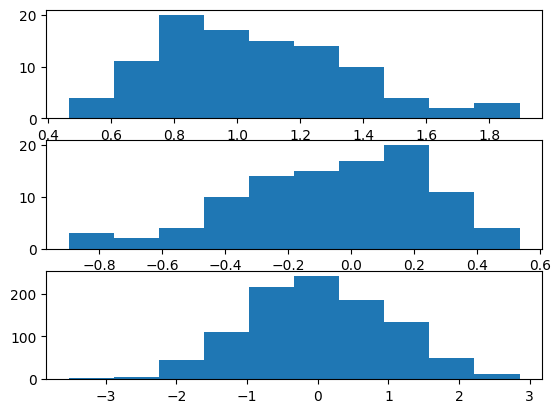

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1)

X = pd.Series(np.random.lognormal(0,.3,100))
Xp = pd.Series(1-X)
Xn = pd.Series(np.random.normal(0,1,1000))

axs[0].hist(X, bins = 10, )
axs[1].hist(Xp, bins = 10 ,)
axs[2].hist(Xn, bins = 10 ,)

### Exercício 5

Pesquise sobre as medidas (coeficientes) de assimetria de Pearson e de Bowley e as implemente. Utilize para calcular os coeficientes de assimetria do IMC.

In [187]:
#coeficiente de assimetria de Pearson = 3*(media - mediana)/desvio_padrao
coeficienteAssimetriaPearson = 3*(df['bmi'].mean() - df['bmi'].median())/df['bmi'].std()
print("O coeficiente de assimetria de Pearson é:", coeficienteAssimetriaPearson)

#coeficiente de assimetria de Bowley = (Q3 + Q1 - 2*Q2)/(Q3 - Q1)
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.5)
Q3 = df['bmi'].quantile(0.75)
coeficienteAssimetriaBowley = (Q3 + Q1 - 2*Q2)/(Q3 - Q1)
print("O coeficiente de assimetria de Bowley é:", coeficienteAssimetriaBowley)

O coeficiente de assimetria de Pearson é: 0.30299089851008837
O coeficiente de assimetria de Bowley é: 0.04166666666666651
